                                Homework assignment 1 - Kashish Kumar 
                                
Importing the yelp data set which has infomration on many different types of businesses. 
Filter the data for only "restaurants". 
This had to be done by searching for keywords within the string description of "categories"
There are lattitude and longitude fields which I used to try and create a map. There were too few businesses accross the country. 

Also realized that the data contains businesses in Canada (using state). 
Calculated average restarant rating by state, picked out the top states. 


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
yelpData = pd.read_csv("yelp_business.csv")

In [5]:
yelpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
business_id     174567 non-null object
name            174567 non-null object
neighborhood    68015 non-null object
address         174567 non-null object
city            174566 non-null object
state           174566 non-null object
postal_code     173944 non-null object
latitude        174566 non-null float64
longitude       174566 non-null float64
stars           174567 non-null float64
review_count    174567 non-null int64
is_open         174567 non-null int64
categories      174567 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


In [6]:
yelpData.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [7]:
yelpData['categories'].value_counts()

Restaurants;Pizza                                                                                                                                                                              990
Pizza;Restaurants                                                                                                                                                                              987
Food;Coffee & Tea                                                                                                                                                                              978
Nail Salons;Beauty & Spas                                                                                                                                                                      936
Coffee & Tea;Food                                                                                                                                                                              929
Beauty & Spas;Nail Salons

In [52]:
yelpRestaurants = yelpData[yelpData['categories'].str.contains("Restaurants")]

In [14]:
yelpRestaurants.head(10)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",NaN,"""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...
14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Uptown,"""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,Restaurants;American (Traditional)
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",Yonge and Eglinton,"""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,Italian;French;Restaurants
19,Gu-xs3NIQTj3Mj2xYoN2aw,"""Maxim Bakery & Restaurant""",NaN,"""9665 Bayview Avenue, Unit 1-4""",Richmond Hill,ON,L4C 9V4,43.867565,-79.412662,3.5,34,1,French;Food;Bakeries;Restaurants
25,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,3.5,39,1,Tiki Bars;Nightlife;Mexican;Restaurants;Bars
28,Dj0S-Oe4ytRJzMGUPgYUkw,"""Panera Bread""",NaN,"""38295 Chestnut Ridge Rd""",Elyria,OH,44035,41.343078,-82.067140,2.0,4,1,Soup;Salad;Sandwiches;Restaurants
29,gAy4LYpsScrj8POnCW6btQ,"""Toast Cafe""",NaN,"""2429 Hwy 160 W""",Fort Mill,SC,29708,35.047287,-80.990559,3.5,6,0,Food;American (Traditional);Coffee & Tea;Resta...
30,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",NaN,"""2777 Steeles Avenue W""",Toronto,ON,M3J 3K5,43.781816,-79.490433,5.0,3,1,Restaurants;Breakfast & Brunch


C:\Users\KKUMAR\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


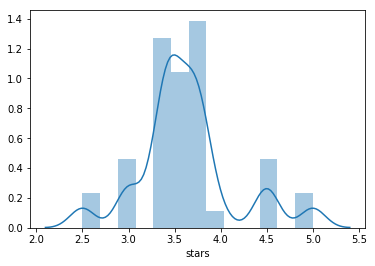

In [21]:
sns.distplot(yelpRestaurants.groupby(['state'])['stars'].mean());

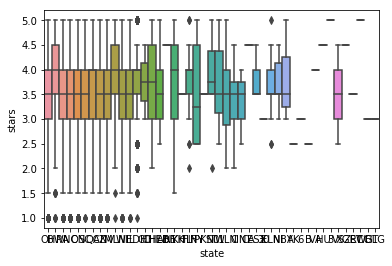

In [155]:
sns.boxplot(yelpRestaurants.state, yelpRestaurants.stars, width=1);

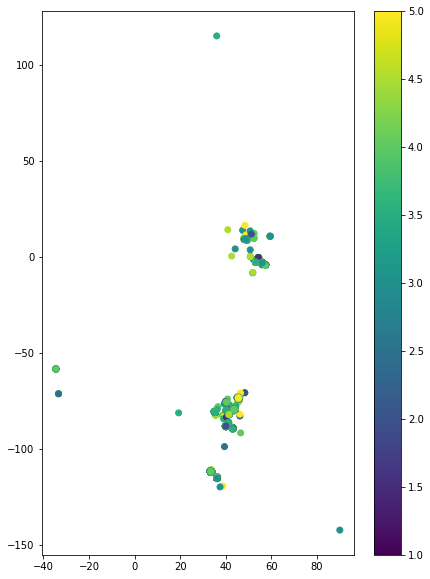

In [162]:
plt.figure(figsize = (7, 10))
plt.scatter(yelpRestaurants.latitude, yelpRestaurants.longitude, c = yelpRestaurants.stars)
plt.colorbar();

# tried to create a map verison but turns out not enough data accross different states to make this menaingful.  

In [56]:
yelpRestaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54618 entries, 4 to 174558
Data columns (total 13 columns):
business_id     54618 non-null object
name            54618 non-null object
neighborhood    24519 non-null object
address         54618 non-null object
city            54618 non-null object
state           54618 non-null object
postal_code     54517 non-null object
latitude        54618 non-null float64
longitude       54618 non-null float64
stars           54618 non-null float64
review_count    54618 non-null int64
is_open         54618 non-null int64
categories      54618 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 5.8+ MB


In [59]:
yelp4stars= yelpRestaurants[yelpRestaurants.stars >= 4.0]

In [60]:
yelp4stars.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",NaN,"""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...
30,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",NaN,"""2777 Steeles Avenue W""",Toronto,ON,M3J 3K5,43.781816,-79.490433,5.0,3,1,Restaurants;Breakfast & Brunch
33,FXHfcFVEfI1vVngW2gVOpw,"""Bampot House of Tea & Board Games""",NaN,"""201 Harbord Street""",Toronto,ON,M5S 1H6,43.661582,-79.408878,4.0,55,1,Coffee & Tea;Restaurants;Food;Mediterranean;Te...
50,-ooEO2YqDQVYNHnSF2BPfw,"""Restaurant Lucca""",Rosemont-La Petite-Patrie,"""12 Rue Dante""",Montréal,QC,H2S 1J5,45.532896,-73.613604,4.5,11,1,Italian;Restaurants


In [73]:
def top(df, n=5, column='stars'):
    return df.sort_values(by = column)[-n:]

In [75]:
yelp4stars.sort_values('stars',ascending=False).groupby('state').apply(top)

business_id  \
state                                  
01    54867   WU_41ySU7HoF62lpTr633w   
      99375   VR6vnB56lpH1Oa8rYIXpUw   
      17311   -HpY7t06AtvasLfJJmY2ww   
      49646   JAyiN0OolvgdL2kliTNDnA   
3     115963  Fg1rIT-n0fBngEaSR1uMPw   
ABE   4738    yIz8LP6oQ3oVFfG55qOCDw   
AZ    29275   aNclt-yBXEOUg2WK0DweKw   
      68717   Llm_iXzE0-8_XKwI2e4JdA   
      27677   0zr7FB0nnZXJmwb94yTbJQ   
      29383   NoVhmZpDGk41i4tQgApKHA   
      126117  JO_hCJISMK3sz_RWhg2e0A   
BW    63185   N9a0SjHqBqQBe06fTAicXg   
      33335   WSQEZC8mL9M6CIITBdhVjQ   
      32628   p1FPUxkQfSFqJGIkrF4abg   
      148029  OkohZaV6gYCylMSeFxYYKA   
      20952   RtQyteKDfoZl0paLMcdWYg   
BY    67878   5X1UP2N34AjVcB9leAi7Jw   
C     172502  piGZT9s91x7TD4xiflRedA   
      133382  qA2TaTMt2jML4fjU4dA0BA   
      51585   4-xLjGavuWFqEfNuznxL3A   
      24154   ddCkH1pCgjmdtyXo5mMVBA   
      16069   ipYpcSq1kgfxNjdw4ro7qw   
CA    22535   UntbR8C0Mxsfd-hNBZXO-w   
CHE   111381  pRF-BjqI9TBqzXGEGBTCaA   
      136981  B6dxBfVs2M4v0NylQH_OvA   
      58053   88OLZsPHpFzMDB0fBQoD9Q   
      38451   Ze94YWaXJXQGJSQCL-o7bA   
      72329   C9ip2ICBwpZwB0_N-JKc7w   
CO    6307    fh4hlhzpwQRPg82gFLDLdg   
EDH   41567   Ln1-9GXePIu0tG8ZZVLflQ   
...                              ...   
PA    135148  3xXU6QBovnxeLSOkrRQI8A   
      149601  QF8hmN_g6n0BTlLJ0tT9Hg   
      126182  Qs5fQqmc_yWmgZjHcadU7g   
QC    27866   C3PK_1n4xHuC3eCo_azYgw   
      27833   0qA5bg4T1Nhs5Cl-TRN5RA   
      64477   ZULqUEDBji9MiNIFlojt9w   
      145932  D8AJWGM1GfW_sdaD6UB_BA   
      77902   pwGZCWUZNq8AEVLhoirwkA   
RCC   159120  Z-xY1V3kYwtU4kDcyxwINg   
SC    134430  u5Xa3N90_jhbBGKU2e4Y3w   
      49104   F1tRni0x93nfRA-O5SHHzg   
      86488   R_4y2Cearf2XpfMoiisxcA   
      12450   Jp7DWno_5zAYtrpEkc0ylw   
      117969  2Zjr-wXPQJfw1Ew_ez8i0Q   
ST    12527   DEsbgNv8xgJSQZPSLM8AZw   
      52372   ub2HatLrydRzmpYJi06i2w   
      20484   2WasbuEvx8UQ17rS9LC7fg   
VA    80956   WA5c3d6rhjioD3Ri4nCX1A   
VS    123335  YSEW66iMAheOH1x6YYZEPA   
WI    29052   W1cboNmS6QWJHJBq3Kbx3g   
      29380   zv7ApWWtKbu1r_qNK4SFrg   
      134251  eGhPPX148Cs3YSXzORz9Jw   
      155076  PFPcb0AwU6zBDEstjj1kSw   
      127059  O2OD-ojkZXsSbFyzpuvtIA   
WLN   85176   Imhm1er4ASIDxB5cSPisAg   
      66108   0K1eWoVWOxYITRGCygYumQ   
      66661   tDiUIdsssugrYl3oRbURcA   
      31028   iNVRlLQtqEwadJL31S8U-w   
      48799   hP1eQ79JMn7Nna8sCKlAAQ   
XGL   142651  8F4n9wX3mrD5MK4Nq2yeRg   

                                                     name  \
state                                                       
01    54867                                  "Moss Sushi"   
      99375                                      "Go'Bua"   
      17311                                     "Husmann"   
      49646                                   "Bifferiet"   
3     115963                              "Schweinberger"   
ABE   4738             "French Connection Baguette House"   
AZ    29275                               "Gloria's Cafe"   
      68717                                 "Saffron JAK"   
      27677                                   "Cafe 1010"   
      29383                                  "BBQ Island"   
      126117                           "Iss' Magic Mixes"   
BW    63185                "Bäckerei Andreas Blankenhorn"   
      33335                                    "Kirchtal"   
      32628                               "épicerie fine"   
      148029                      "PSV Vereinsgaststätte"   
      20952                    "Restaurant Hotel am Park"   
BY    67878                          "Gasthof Lindenwirt"   
C     172502               "Sociedad Alemana de Gimnasia"   
      133382                              "Club Hungaria"   
      51585                                    "D' Lucky"   
      24154                           "Le Pain Quotidien"   
      16069                      "El Club de la Milanesa"   
CA    22535                             

In [128]:
funcs = ['mean', 'max', 'min', 'std', 'count']

SyntaxError: invalid syntax (<ipython-input-128-dc8304ff5a8f>, line 1)

In [114]:
df = yelpRestaurants.groupby('state')['stars'].agg(funcs)
df.head()

,mean,max,min,std,count
state,,,,,
01,3.7,5.0,2.5,0.788811,10
3,5.0,5.0,5.0,NaN,1
30,3.0,3.0,3.0,NaN,1
6,3.0,3.0,3.0,NaN,1
ABE,4.5,4.5,4.5,NaN,1


In [117]:
df.sort_values('count', ascending=False).head(10)

,mean,max,min,std,count
state,,,,,
ON,3.378935,5.0,1.0,0.759501,13501
AZ,3.413286,5.0,1.0,0.806972,10598
NV,3.443798,5.0,1.0,0.803471,7135
QC,3.648665,5.0,1.0,0.773126,4981
OH,3.409327,5.0,1.0,0.827430,4814
NC,3.384675,5.0,1.0,0.812956,3850
PA,3.489443,5.0,1.0,0.783966,3647
BW,3.742569,5.0,1.0,0.720799,1783
WI,3.454952,5.0,1.0,0.785935,1565


In [140]:
df[df['count']>100]['mean'].plot?

Object `plot` not found.


In [154]:
df[df['count']>100]['mean']

state
AZ     3.413286
BW     3.742569
EDH    3.813014
IL     3.323576
NC     3.384675
NV     3.443798
OH     3.409327
ON     3.378935
PA     3.489443
QC     3.648665
SC     3.302817
WI     3.454952
Name: mean, dtype: float64

In [156]:
df = df[df['count']>100]

In [171]:
df.iloc[:2]

,mean,max,min,std,count
state,,,,,
AZ,3.413286,5.0,1.0,0.806972,10598
BW,3.742569,5.0,1.0,0.720799,1783


In [ ]:
# which state has the most 5 star restaurants and which have the highest % of 5 star restaurants given 
# that they have more than a certain number of reviews. 



